<a href="https://colab.research.google.com/github/Huy987asd/BT/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step


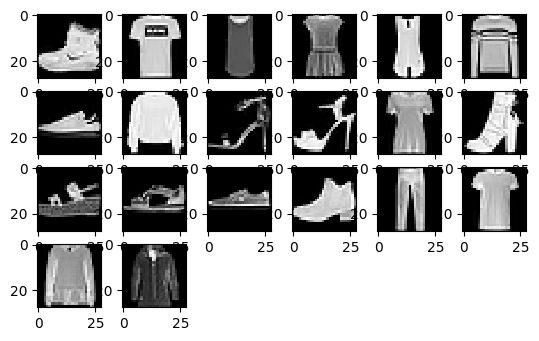

(60000, 10)
(10000, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                            

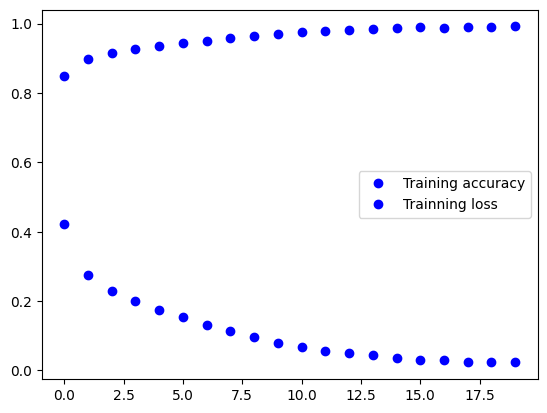

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
for i in range(20):
    plt.subplot(5, 6, i + 1)
    plt.imshow(x_train[i],cmap='gray',
               interpolation='none')
plt.show()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)


from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

model=Sequential()
#dang1
#32 lan tich chap(Conv2D)
#kernel_size: kich thuoc bo loc
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',
                 input_shape=(28,28,1),padding='same'))
#Bo loc LeakyReLU
model.add(LeakyReLU(alpha=0.1))
#Tao max_padding
model.add(MaxPooling2D((2,2),padding='same'))

batch_size=64
epochs=20
classes=10

#dang2
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
#Taoj ra CNN
model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

#vẽ biểu đồ
from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs, verbose=1)
model.save('model1.h5')
loss=train.history['loss']
accuracy=train.history['accuracy']
print(accuracy)
print(loss)
plt.plot(accuracy,'bo',label='Training accuracy')
plt.plot(loss,'bo',label='Trainning loss')
plt.legend()
plt.show()
